In [50]:
from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType
from HARK.distribution import Bernoulli

import matplotlib.pyplot as plt
import numpy as np

## Original Perfect Foresight Example

In [13]:
PFexample = PerfForesightConsumerType()
PFexample.cycles = 0

SimulationParams = {
    "AgentCount": 10000,  # Number of agents of this type
    "T_sim": 120,  # Number of periods to simulate
    "aNrmInitMean": -6.0,  # Mean of log initial assets
    "aNrmInitStd": 0, #1.0,  # Standard deviation of log initial assets
    "pLvlInitMean": 0.0,  # Mean of log initial permanent income
    "pLvlInitStd": 0.0,  # Standard deviation of log initial permanent income
    "PermGroFacAgg": 1.0,  # Aggregate permanent income growth factor
    "T_age": None,  # Age after which simulated agents are automatically killed,
    "LivPrb": [1.0] # [0.98]
}

PFexample.assign_parameters(**SimulationParams)

In [14]:

PFexample.solve()

In [15]:
PFexample

<HARK.ConsumptionSaving.ConsIndShockModel.PerfForesightConsumerType object at 0x7fa6f7367220.
Parameters:
cycles: 1
CRRA: 2.0
Rfree: 1.03
DiscFac: 0.96
LivPrb: [1.0]
PermGroFac: [1.01]
BoroCnstArt: None
MaxKinks: 400
AgentCount: 10000
aNrmInitMean: -6.0
aNrmInitStd: 0
pLvlInitMean: 0.0
pLvlInitStd: 0.0
PermGroFacAgg: 1.0
T_age: None
T_cycle: 1
PerfMITShk: False
T_sim: 120>

In [62]:
PFexample.track_vars = ["mNrm","pLvl"]
PFexample.initialize_sim()
PFexample.simulate()

{'mNrm': array([[  1.00252784,   1.00252784,   1.00252784, ...,   1.00252784,
           1.00252784,   1.00252784],
        [  0.20624094,   0.20624094,   0.20624094, ...,   0.20624094,
           0.20624094,   0.20624094],
        [ -0.57773444,  -0.57773444,  -0.57773444, ...,  -0.57773444,
          -0.57773444,  -0.57773444],
        ...,
        [-42.18087615, -42.18087615, -42.18087615, ..., -42.18087615,
         -42.18087615, -42.18087615],
        [-42.30949766, -42.30949766, -42.30949766, ..., -42.30949766,
         -42.30949766, -42.30949766],
        [-42.43613053, -42.43613053, -42.43613053, ..., -42.43613053,
         -42.43613053, -42.43613053]]),
 'pLvl': array([[1.01      , 1.01      , 1.01      , ..., 1.01      , 1.01      ,
         1.01      ],
        [1.0201    , 1.0201    , 1.0201    , ..., 1.0201    , 1.0201    ,
         1.0201    ],
        [1.030301  , 1.030301  , 1.030301  , ..., 1.030301  , 1.030301  ,
         1.030301  ],
        ...,
        [3.23535623,

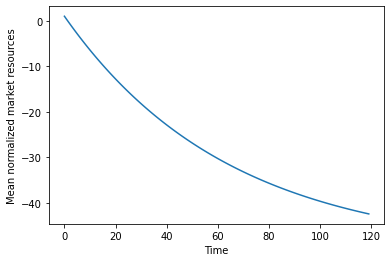

In [63]:
plt.plot(np.mean(PFexample.history["mNrm"], axis=1))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

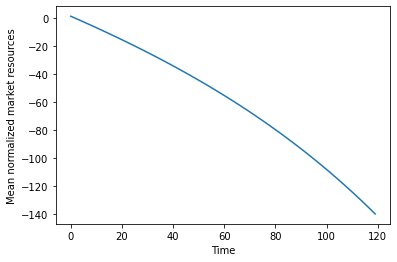

In [64]:
plt.plot(np.mean(PFexample.history["mNrm"] * PFexample.history["pLvl"], axis=1))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

/tmp/ipykernel_11254/947589964.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(PFexample.history["mNrm"], axis=1) - np.min(np.mean(PFexample.history["mNrm"], axis=1))))


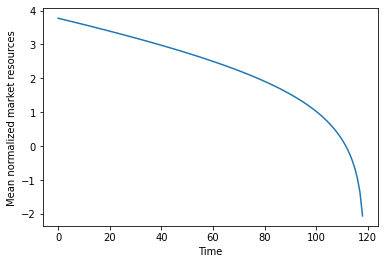

In [65]:
plt.plot(np.log(np.mean(PFexample.history["mNrm"], axis=1) - np.min(np.mean(PFexample.history["mNrm"], axis=1))))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

## Using the Generic Monte Carlo Simulator

In [70]:
from HARK.distribution import Lognormal
import HARK.models.perfect_foresight_normalized as pfn
from HARK.simulation.monte_carlo import AgentTypeMonteCarloSimulator

In [72]:
pfn.model

{'shocks': {'live': <HARK.distribution.Bernoulli at 0x7fa6f5a29030>},
 'parameters': {'DiscFac': 0.96,
  'CRRA': (2.0,),
  'Rfree': 1.03,
  'LivPrb': 0.98,
  'PermGroFac': 1.01,
  'BoroCnstArt': None},
 'dynamics': {'p': <function HARK.models.perfect_foresight_normalized.<lambda>(PermGroFac, p)>,
  'r_eff': <function HARK.models.perfect_foresight_normalized.<lambda>(Rfree, PermGroFac)>,
  'b_nrm': <function HARK.models.perfect_foresight_normalized.<lambda>(r_eff, a_nrm)>,
  'm_nrm': <function HARK.models.perfect_foresight_normalized.<lambda>(b_nrm)>,
  'c_nrm': <HARK.model.Control at 0x7fa6f6902380>,
  'a_nrm': <function HARK.models.perfect_foresight_normalized.<lambda>(m_nrm, c_nrm)>},
 'reward': {'u': <function HARK.models.perfect_foresight_normalized.<lambda>(c)>}}

In [73]:
pfn.model['parameters']['LivPrb'] = 1.0
pfn.model['shocks'] = {'live' : Bernoulli(1.0)}

In [85]:
pfn_simulator = AgentTypeMonteCarloSimulator(
    pfn.model['parameters'],
    pfn.model['shocks'],
    pfn.model['dynamics'],
    {
        'c_nrm' : lambda m_nrm: PFexample.solution[0].cFunc(m_nrm)
    },
    { # initial states
        'a_nrm' : Lognormal(-6, 0),
        'live' : 1,
        'p' : 1.0
    },
    agent_count = 10000,
    T_sim = 120
)



In [86]:
#pf_simulator.track_vars = ["mNrm"]
pfn_simulator.initialize_sim()
pfn_simulator.simulate(sim_periods=120)

{'live': array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 'p': array([[1.01      , 1.01      , 1.01      , ..., 1.01      , 1.01      ,
         1.01      ],
        [1.0201    , 1.0201    , 1.0201    , ..., 1.0201    , 1.0201    ,
         1.0201    ],
        [1.030301  , 1.030301  , 1.030301  , ..., 1.030301  , 1.030301  ,
         1.030301  ],
        ...,
        [3.23535623, 3.23535623, 3.23535623, ..., 3.23535623, 3.23535623,
         3.23535623],
        [3.2677098 , 3.2677098 , 3.2677098 , ..., 3.2677098 , 3.2677098 ,
         3.2677098 ],
        [3.30038689, 3.30038689, 3.30038689, ..., 3.30038689, 3.30038689,
         3.30038689]]),
 'r_eff': array([[1.01980198, 1.01980198, 1.01980198, ..., 1.01980198, 1.01980198,
         1.01980198],
        [1.01980198, 1.01980198, 1.0198019

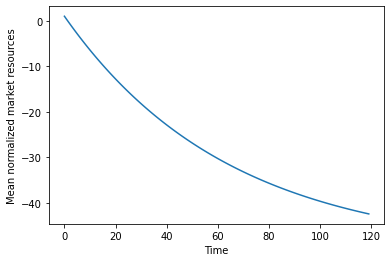

In [87]:
plt.plot(np.mean(pfn_simulator.history['m_nrm'], axis=1))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

/tmp/ipykernel_11254/2889722531.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(pfn_simulator.history["m_nrm"], axis=1) - np.min(np.mean(pfn_simulator.history["m_nrm"], axis=1))))


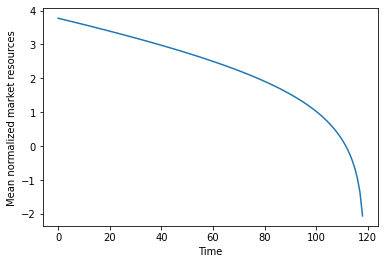

In [88]:
plt.plot(np.log(np.mean(pfn_simulator.history["m_nrm"], axis=1) - np.min(np.mean(pfn_simulator.history["m_nrm"], axis=1))))
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.show()

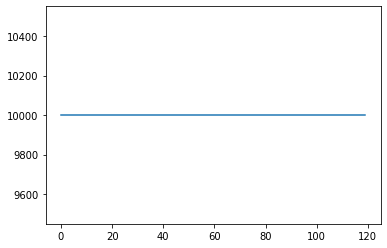

In [89]:
plt.plot(pfn_simulator.history['live'].sum(axis=1))

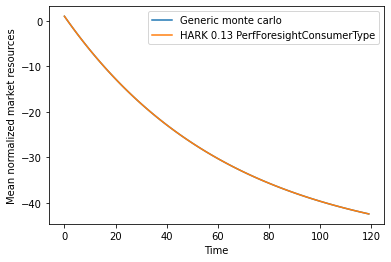

In [90]:
plt.plot(np.mean(pfn_simulator.history['m_nrm'], axis=1), label = 'Generic monte carlo')
plt.plot(np.mean(PFexample.history["mNrm"], axis=1), label = 'HARK 0.13 PerfForesightConsumerType')
plt.xlabel("Time")
plt.ylabel("Mean normalized market resources")
plt.legend()
plt.show()

In [93]:
np.mean(pfn_simulator.history['m_nrm'], axis=1) - np.mean(PFexample.history["mNrm"], axis=1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])